# Les failles de Fourier

1.

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_signal(start, stop, f, nb_vals=400, phi=0):
    x_axis = np.linspace(start, stop, nb_vals)
    return np.array([sin(2* pi * f * t + phi) for t in x_axis])

In [3]:
x_axis = np.linspace(0, 200, 800)

phi = 0
f = 0.1

signal_1 = get_signal(0, 100, 0.1)
signal_2 = get_signal(100, 200, 0.3)

In [4]:
signal1 = np.concatenate([signal_1, 
                        signal_2])
signal2 = np.concatenate([signal_2, 
                        signal_1])

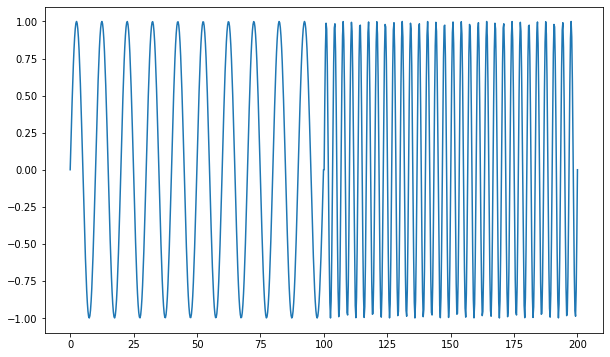

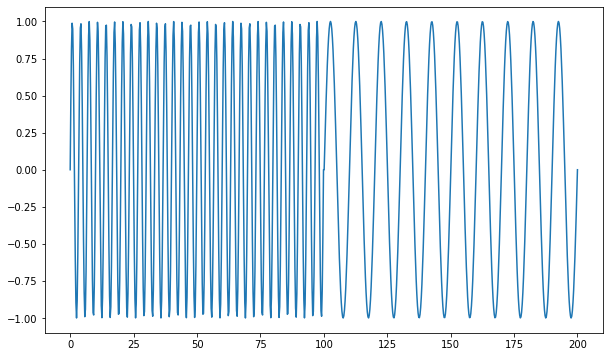

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, signal1)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_axis, signal2)
plt.show()

In [6]:
ft1 = np.fft.fft(signal1)
ft2 = np.fft.fft(signal2)

In [7]:
def plot_signal(ft):
    freqs = np.fft.fftfreq(len(ft), 200 / len(ft))
    modulus = np.abs(ft)
    phase = np.angle(ft)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(freqs, modulus)
    ax2.plot(phase)

    plt.show()

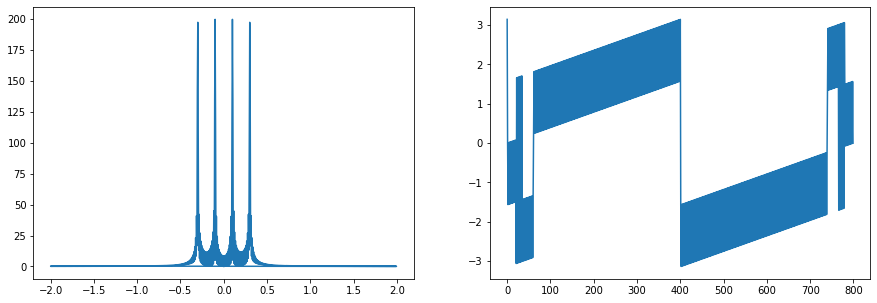

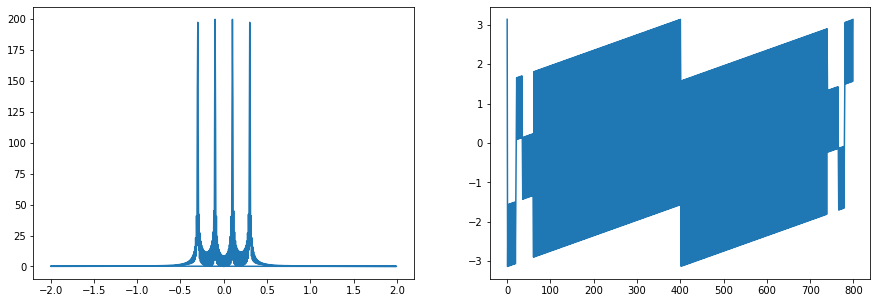

In [8]:
plot_signal(ft1)
plot_signal(ft2)

/home/alexandre/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


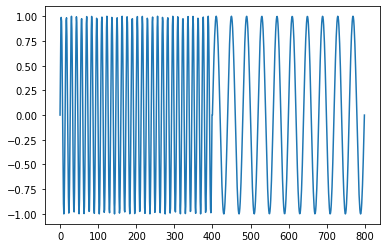

In [9]:
plt.plot(np.fft.ifft(abs(ft1) * np.exp(1j * np.angle(ft2))))

# Séparation temporelle des fréquences

In [10]:
def gen_hamming(width, center, length):
    out = np.zeros(length)
    out[center - width // 2: center + width // 2] = np.hamming(width)
    return out

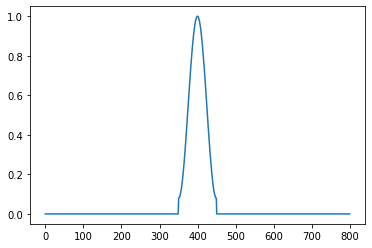

In [11]:
plt.plot(gen_hamming(100, 400, 800))

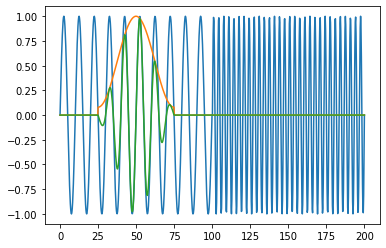

In [12]:
plt.plot(x_axis, signal1)
plt.plot(x_axis, gen_hamming(200, 200, 800))

plt.plot(x_axis, signal1 * gen_hamming(200,200,800))

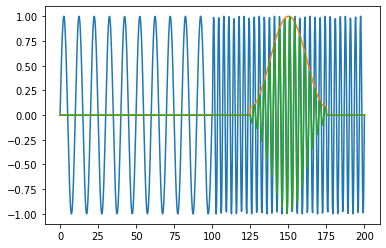

In [13]:
plt.plot(x_axis, signal1)
plt.plot(x_axis, gen_hamming(200, 600, 800))

plt.plot(x_axis, signal1 * gen_hamming(200,600,800))

(-0.5, 0.5)

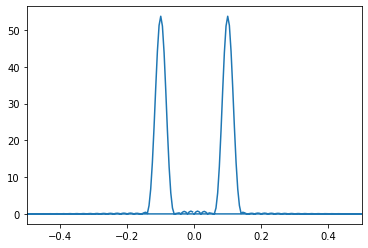

In [14]:
plt.plot(np.fft.fftfreq(800, 2/8),abs(np.fft.fft(signal1 * gen_hamming(200, 200, 800))))
plt.xlim(-0.5, 0.5)

(-0.5, 0.5)

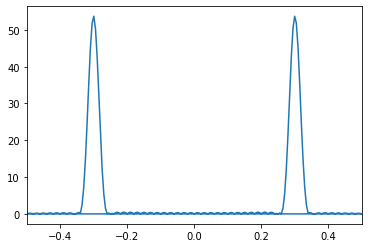

In [15]:
plt.plot(np.fft.fftfreq(800, 2/8),abs(np.fft.fft(signal1 * gen_hamming(200, 600, 800))))
plt.xlim(-0.5, 0.5)

Oui les fréquences ont bien été séparées.